In [ ]:
# загрузка библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import plotly as px
from PIL import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

#Задание Ultra Lite

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

Запустите сеть с различными размерами обучающей и проверочной выборок:

* Размер test_size=0.1
* Размер test_size=0.5
* Размер test_size=0.9

Напишите выводы, как изменение test_size влияет на точность сети.

In [ ]:
# загрузка данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
# решейп данных (28,28) -> (784)
x_train = x_train_org.reshape(x_train_org.shape[0],x_train_org.shape[1]*x_train_org.shape[2])
x_test = x_test_org.reshape(x_test_org.shape[0],x_test_org.shape[1]*x_test_org.shape[2])
# нормировка данных
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
# приводим y
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

NameError: ignored

In [ ]:
print('Размерность обучающей выборки ', x_train.shape)
print('Размерность тестовой выборки ', x_test.shape)

In [ ]:
# разделим на обучающую и проверочную выборки (x_train)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=True)
print('Размерность обучающей выборки ', x_tr.shape)
print('Размерность проверочной выборки ', x_val.shape)
print('Размерность обучающей выборки ', y_tr.shape)
print('Размерность проверочной выборки ', y_val.shape)
# либо можно использовать validation_split при вызове метода fit

In [ ]:
# создаем модель
def createModel():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
  model.add(Dense(256,  activation='relu'))
  model.add(Dense(10, activation='sigmoid'))

  # Компилируем сеть
  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model # Возвращаем созданную сеть

In [ ]:
# размер test_size=0.1
model01 = createModel()

model01.fit(x_train, y_train,
            batch_size=128,
            epochs=20,
            validation_split=0.1, # 10% - для проверочной выборки
            verbose=1)

на последней эпохе обучения:

ошибка на обучающем наборе accuracy = 99.79%

ошибка на проверочном наборе val_accuracy = 98.40%

получили хорошую точность на проверочном наборе - делаем вывод, что сеть не переобучается на обучающем наборе, т.е. на проверочном выделяет нужные признаки

In [ ]:
# размер test_size=0.1
model01 = createModel()
# зададим через validation_data
model01.fit(x_tr, y_tr,
            batch_size=128,
            epochs=20,
            validation_data=(x_val,y_val), 
            verbose=1)

на последней эпохе обучения:

ошибка на обучающем наборе accuracy = 99.85%

ошибка на проверочном наборе val_accuracy = 98.08%

в целом та же точность 

In [ ]:
# размер test_size=0.5
model05 = createModel()

model05.fit(x_train, y_train,
            batch_size=128,
            epochs=20,
            validation_split=0.5, # 50% - для проверочной выборки
            verbose=1)

на последней эпохе обучения:

ошибка на обучающем наборе accuracy = 99.71%

ошибка на проверочном наборе val_accuracy = 96.78%

уменьшили обучющую выборку - точность на проверочной снизилась (+ на проверочной выборке стало больше данных)

In [ ]:
# размер test_size=0.9
model09 = createModel()

model09.fit(x_train, y_train,
            batch_size=128,
            epochs=20,
            validation_split=0.9, # 90% - для провероной выборки
            verbose=1)

на последней эпохе обучения:

ошибка на обучающем наборе accuracy = 100%

ошибка на проверочном наборе val_accuracy = 94.82%

маленькая обучающая выборка - точность быстро становится равной 100%

на проверочной выборке - неплохие результаты - точность больше 90%

в итоге при выборе размера обучающей и проверочной выборки требуется чтобы обучающая выборка была больше проверочной, но в то же время проверочная выборка должна содержать все примеры обучающей, чтобы по проверочной точности можно было оценить работу всей сети

#Задание Lite

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

1. Запустите сеть с различными размерами обучающей и проверочной выборок:

* Обучающая выборка 50.000 примеров
* Обучающая выборка 10.000 примеров
* Обучающая выборка 500 примеров

2. Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. 
3. Создайте сеть следующей архитектуры:

* 4 Dense слоя
* 3 Dropout слоя
* 3 BatchNormalization слоя

Напишите свои выводы по результатам проведенных тестов.

## 1. Сети с различными размерами обучающей и проверочной выборками

In [ ]:
model50 = createModel()
n_len = x_train.shape[0]
n_val = n_len - 50000

# обучаем сеть
model50.fit(x_train[:n_len-n_val], # 50.000 примеров
          y_train[:n_len-n_val], 
          batch_size=128, 
          epochs=20,
          validation_data=(x_train[n_len-n_val:], y_train[n_len-n_val:]), 
          verbose=1)

Epoch 1/20
391/391 [==============================] - 4s 5ms/step - loss: 0.4485 - accuracy: 0.8715 - val_loss: 0.1313 - val_accuracy: 0.9598
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9700 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0821 - val_accuracy: 0.9758
Epoch 4/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0968 - val_accuracy: 0.9735
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0792 - val_accuracy: 0.9774
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.0791 - val_accuracy: 0.9784
Epoch 7/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0889 - val_accuracy: 0.9774
Epoch 

обучающая выборка 50.000 примеров -  проверочная выборка 10.000 примеров

accuracy = 99.78% val_accuracy = 98.11%

In [ ]:
model10 = createModel()
n_len = x_train.shape[0]
n_val = n_len - 10000
print()
# обучаем сеть
model10.fit(x_train[:n_len-n_val], # 10.000 примеров
          y_train[:n_len-n_val], 
          batch_size=128, 
          epochs=20,
          validation_data=(x_train[n_len-n_val:], y_train[n_len-n_val:]), 
          verbose=1)


Epoch 1/20
79/79 [==============================] - 2s 18ms/step - loss: 0.9041 - accuracy: 0.7390 - val_loss: 0.2796 - val_accuracy: 0.9191
Epoch 2/20
79/79 [==============================] - 1s 16ms/step - loss: 0.1917 - accuracy: 0.9463 - val_loss: 0.2047 - val_accuracy: 0.9397
Epoch 3/20
79/79 [==============================] - 1s 15ms/step - loss: 0.1278 - accuracy: 0.9639 - val_loss: 0.1932 - val_accuracy: 0.9408
Epoch 4/20
79/79 [==============================] - 1s 15ms/step - loss: 0.0800 - accuracy: 0.9778 - val_loss: 0.1822 - val_accuracy: 0.9467
Epoch 5/20
79/79 [==============================] - 1s 16ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.1679 - val_accuracy: 0.9526
Epoch 6/20
79/79 [==============================] - 1s 16ms/step - loss: 0.0345 - accuracy: 0.9913 - val_loss: 0.1763 - val_accuracy: 0.9497
Epoch 7/20
79/79 [==============================] - 1s 16ms/step - loss: 0.0192 - accuracy: 0.9963 - val_loss: 0.1803 - val_accuracy: 0.9516
Epoch 8/20
7

обучающая выборка 10.000 примеров -  проверочная выборка 50.000 примеров

accuracy = 100% val_accuracy = 96.11%

In [ ]:
model500 = createModel()
n_len = x_train.shape[0]
n_val = n_len - 500
print()
# обучаем сеть
model500.fit(x_train[:n_len-n_val], # 500 примеров
          y_train[:n_len-n_val], 
          batch_size=128, 
          epochs=20,
          validation_data=(x_train[n_len-n_val:], y_train[n_len-n_val:]), 
          verbose=1)


Epoch 1/20
4/4 [==============================] - 3s 469ms/step - loss: 2.1060 - accuracy: 0.3334 - val_loss: 1.5404 - val_accuracy: 0.6502
Epoch 2/20
4/4 [==============================] - 1s 333ms/step - loss: 1.1559 - accuracy: 0.8118 - val_loss: 0.9792 - val_accuracy: 0.7390
Epoch 3/20
4/4 [==============================] - 1s 332ms/step - loss: 0.6004 - accuracy: 0.8814 - val_loss: 0.7059 - val_accuracy: 0.7810
Epoch 4/20
4/4 [==============================] - 1s 334ms/step - loss: 0.3640 - accuracy: 0.9030 - val_loss: 0.6200 - val_accuracy: 0.8053
Epoch 5/20
4/4 [==============================] - 1s 335ms/step - loss: 0.2606 - accuracy: 0.9318 - val_loss: 0.5849 - val_accuracy: 0.8129
Epoch 6/20
4/4 [==============================] - 1s 332ms/step - loss: 0.1937 - accuracy: 0.9375 - val_loss: 0.5642 - val_accuracy: 0.8227
Epoch 7/20
4/4 [==============================] - 1s 330ms/step - loss: 0.1328 - accuracy: 0.9729 - val_loss: 0.5932 - val_accuracy: 0.8271
Epoch 8/20
4/4 [===

In [ ]:
predict = model500.predict(x_train[n_len-n_val:])
y_val_ = y_train[n_len-n_val:]
x_val_org = x_train_org[n_len-n_val:]

In [ ]:
print(predict.shape)
print(y_val_.shape)

(59500, 10)
(59500, 10)


In [ ]:
error_predict = []
for i in range(predict.shape[0]):
  if (np.argmax(predict[i]) != np.argmax(y_val_[i])):
    error_predict.append(i)
error_predict = np.array(error_predict)

In [ ]:
error_predict[0:100]

array([  0,   3,   4,   6,   9,  12,  27,  28,  33,  40,  44,  47,  58,
        61,  74,  76,  88,  89, 101, 102, 103, 108, 110, 111, 113, 114,
       126, 127, 129, 130, 131, 135, 144, 146, 159, 165, 167, 170, 196,
       199, 204, 212, 218, 220, 240, 245, 248, 249, 260, 270, 272, 278,
       282, 286, 292, 301, 308, 326, 328, 343, 344, 346, 350, 354, 363,
       364, 379, 384, 386, 389, 392, 399, 402, 403, 416, 424, 429, 430,
       433, 438, 443, 446, 465, 466, 474, 477, 495, 497, 505, 514, 515,
       516, 519, 524, 529, 532, 535, 547, 555, 574])

Пример картинки


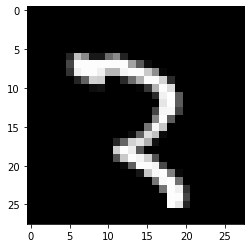

Распознанное значение цифры  2
Истинное значение цифры  3


In [ ]:
plt.imshow(Image.fromarray(x_val_org[0]).convert('RGB'))
print('Пример картинки')
plt.show()
print('Распознанное значение цифры ',np.argmax(predict[0]))
print('Истинное значение цифры ',np.argmax(y_val_[0]))

На этом примере действительно не понятно, что это 3! Я бы тоже предположила, что это 2

Пример картинки


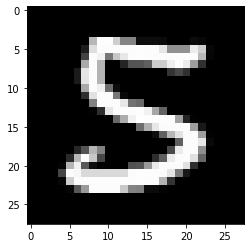

Распознанное значение цифры  3
Истинное значение цифры  5


In [ ]:
plt.imshow(Image.fromarray(x_val_org[4]).convert('RGB'))
print('Пример картинки')
plt.show()
print('Распознанное значение цифры ',np.argmax(predict[4]))
print('Истинное значение цифры ',np.argmax(y_val_[4]))

Сети не хватает данных, чтобы верно распознать соответствующую цифру из-за меленькоц базы данных

обучающая выборка 500 примеров -  проверочная выборка 59.500 примеров

accuracy = 100% val_accuracy = 84.53%

Выводы:

даже при маленькой обучающей выборке - точность на выходе сети неплохая 84.76%, но в обучающей выборке не хватает примеров, поэтому на проверочной существуют такие примеры, которой сети не удается распознать верно

в итоге - обучающая выборка должна быть больше проверочной, чтобы выделить максимально много признаков


## 2. Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. 

In [ ]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim = x_train.shape[1], activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_1.fit(x_train,y_train,
            epochs=20,
            batch_size = 128,
            validation_split=0.2,
            verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6216 - accuracy: 0.8149 - val_loss: 0.1505 - val_accuracy: 0.9552
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1241 - accuracy: 0.9617 - val_loss: 0.1110 - val_accuracy: 0.9661
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9748 - val_loss: 0.0959 - val_accuracy: 0.9712
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0966 - val_accuracy: 0.9718
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0958 - val_accuracy: 0.9717
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0962 - val_accuracy: 0.9724
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0985 - val_accuracy: 0.9740
Epoch 

In [ ]:
model_2 = Sequential()
model_2.add(Dense(10, input_dim = x_train.shape[1], activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_2.fit(x_train,y_train,
            epochs=20,
            batch_size = 128,
            validation_split=0.2,
            verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 1.8759 - accuracy: 0.2849 - val_loss: 0.7300 - val_accuracy: 0.7595
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.7810 - val_loss: 0.5051 - val_accuracy: 0.8493
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.8444 - val_loss: 0.4177 - val_accuracy: 0.8743
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.8718 - val_loss: 0.3777 - val_accuracy: 0.8852
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8930 - val_loss: 0.3277 - val_accuracy: 0.9056
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.9075 - val_loss: 0.3070 - val_accuracy: 0.9116
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.9134 - val_loss: 0.2976 - val_accuracy: 0.9128
Epoch 

маленького количества нейронов в слоях не достаточно, для выдления всех признаков

## 3. Создайте сеть следующей архитектуры:

* 4 Dense слоя
* 3 Dropout слоя
* 3 BatchNormalization слоя


In [ ]:
model = Sequential()
model.add(BatchNormalization(input_dim=x_train.shape[1]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
          validation_split=0.2,
          verbose=1)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5511 - accuracy: 0.8268 - val_loss: 0.1188 - val_accuracy: 0.9640
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1466 - accuracy: 0.9555 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0921 - accuracy: 0.9717 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0768 - accuracy: 0.9753 - val_loss: 0.0840 - val_accuracy: 0.9765
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9796 - val_loss: 0.0865 - val_accuracy: 0.9757
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.0780 - val_accuracy: 0.9779
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0492 - accuracy: 0.9835 - val_loss: 0.0882 - val_accuracy: 0.9772
Epoch 

Получили хорошую точность на проверочной выборке. 

#Задание Pro


Повысьте точность модели по обнаружению мин до 90 % на тестовой выборке. 

Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой.

In [ ]:
# загрузим диск
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g60Q6epzLjOoA7rIZKK00IibeAi60eonsevFr_1Oi2oXlvGqqyZwUE
Mounted at /content/drive


In [ ]:
# разархивируем архив с данными
!unrar x "/content/drive/MyDrive/base2.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/base2.rar

Extracting  sonar.csv                                                      3%  OK 
Extracting  cars_new.csv                                                  99%  OK 
All OK


In [ ]:
# загружаем данные по минам из файла
df = pd.read_csv("sonar.csv", header=None)  
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
dataset = df.values                 
X = dataset[:,0:60].astype(float)   
Y = dataset[:,60]     
# нет мины - '0'              
Y[Y=='R']='0'      
# есть мина - '1'             
Y[Y=='M']='1'                       
Y = Y.astype(int)                   
print(X.shape)                      
print(Y.shape)                      
print(Y)                            

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# создадим обучающую и проверочную выборки 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True) #пермешать данные важно?
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(166, 60)
(42, 60)
(166,)
(42,)


In [ ]:
# создадим нейронную сеть 
model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size=8,
                    epochs=100,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.6804 - accuracy: 0.6095 - val_loss: 0.6129 - val_accuracy: 0.7647
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6742 - val_loss: 0.5764 - val_accuracy: 0.8235
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.6956 - val_loss: 0.5114 - val_accuracy: 0.9412
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7455 - val_loss: 0.4430 - val_accuracy: 0.9412
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.7790 - val_loss: 0.4119 - val_accuracy: 0.8824
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7864 - val_loss: 0.3611 - val_accuracy: 0.8824
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4013 - accuracy: 0.8559 - val_loss: 0.3755 - val_accuracy: 0.8235
Epoch 8/100


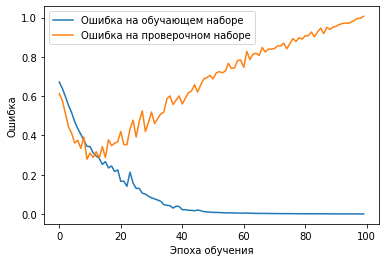

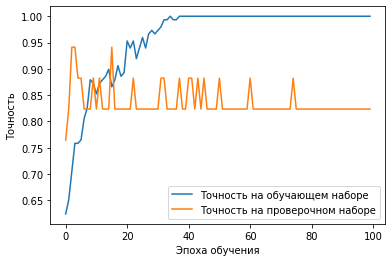

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], 
         label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

Переобучение - точность на проверочной принимает постоянное значение

In [ ]:
# создадим нейронную сеть 
model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size=8,
                    epochs=100,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.7284 - accuracy: 0.4669 - val_loss: 0.7644 - val_accuracy: 0.2941
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7225 - accuracy: 0.4211 - val_loss: 0.7391 - val_accuracy: 0.2941
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.4624 - val_loss: 0.7237 - val_accuracy: 0.2941
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.5363 - val_loss: 0.7104 - val_accuracy: 0.3529
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.4922 - val_loss: 0.6967 - val_accuracy: 0.4118
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6473 - val_loss: 0.6886 - val_accuracy: 0.5294
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6841 - val_loss: 0.6821 - val_accuracy: 0.7059
Epoch 8/100


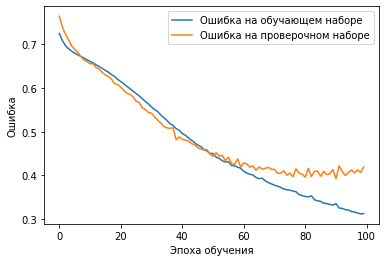

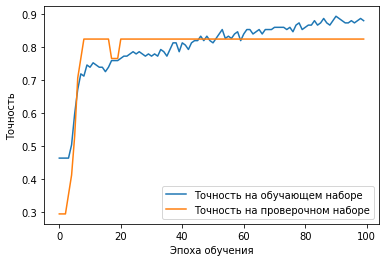

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], 
         label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
# создадим нейронную сеть 
model = Sequential()

model.add(Dense(256, input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size=4,
                    epochs=100,
                    verbose=1)

Epoch 1/100
42/42 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5186
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7631
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7651
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7416
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8356
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8429
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8620
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8814
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8483
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9009
Epoch 11/

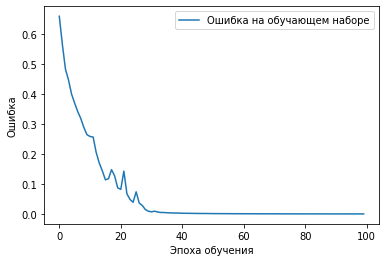

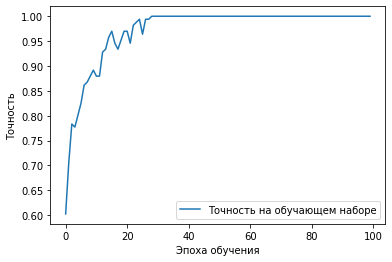

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], 
         label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
#scores состоит из двух знанчений
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 6ms/step - loss: 1.0271 - accuracy: 0.8571
Доля верных ответов на тестовых данных, в процентах: 85.7143%


Точность на тестовой выборке 85.7%
Сделали максимальной по размеру обучающую выборку

In [ ]:
# создадим нейронную сеть 
model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size=4,
                    epochs=100,
                    verbose=1)

Epoch 1/100
42/42 [==============================] - 1s 2ms/step - loss: 0.7032 - accuracy: 0.4343
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5983
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7372
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.6697
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8011
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.7795
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7556
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7688
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8471
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8280
Epoch 11/

In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
#scores состоит из двух знанчений
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 5ms/step - loss: 1.1306 - accuracy: 0.8810
Доля верных ответов на тестовых данных, в процентах: 88.0952%


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size=4,
                    epochs=100,
                    verbose=1)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9775
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9914
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9931
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9847
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9699
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9944
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9973
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 11/

In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
#scores состоит из двух знанчений
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 5ms/step - loss: 1.5829 - accuracy: 0.8095
Доля верных ответов на тестовых данных, в процентах: 80.9524%


Обучение на меньшем шаге - уменьшает точность на тестовой - сеть переобучается на обучающей выборке

In [ ]:
# создадим нейронную сеть 
model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size=4,
                    epochs=100,
                    verbose=1)

Epoch 1/100
42/42 [==============================] - 1s 3ms/step - loss: 0.7180 - accuracy: 0.5068
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7060
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.6930
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5255 - accuracy: 0.7763
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5090 - accuracy: 0.7126
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7598
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7331
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7612
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8442
Epoch 10/100
42/42 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7412
Epoch 11/

In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
#scores состоит из двух знанчений
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

2/2 [==============================] - 0s 5ms/step - loss: 0.7094 - accuracy: 0.7857
Доля верных ответов на тестовых данных, в процентах: 78.5714%


Слой нормализации ухудшает точность

В итоге лучшая точность 88%!

#Задание Ultra pro

По подготовленным на занятии данным, создайте обучающую, тестовую и проверочную выборки. 

По сформированным данным необходимо обучить модель для предсказания цены машины. 

Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. 

(Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен. Это можно сделать с помощью следующего метода:

predict_inverse = y_scaler.inverse_transform(predict).flatten()

где predict - результат предсказания модели.

Затем подсчитайте среднюю ошибку на тестовой выборке, среднюю цену и средний процент ошибки.

Рекомендации:

* В качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse).

* Метрику для данной задачи можно не использовать.

* Последний слой модели должен иметь 1 нейрон.

In [ ]:
cars = pd.read_csv('/content/cars_new.csv', sep=',')
cars[:10]

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
5,hyundai,creta 1 поколение,985000,2016,34067,кроссовер,автомат,бензин,2.0,150.0
6,kia,ceed 2 поколение,589000,2013,98000,хетчбэк,автомат,бензин,1.6,129.0
7,toyota,corolla e140,500000,2008,141000,седан,автомат,бензин,1.6,124.0
8,mercedes-benz,c-класс 180 w204/s204/c204 [рестайлинг],1320000,2015,81112,седан,автомат,бензин,1.6,156.0
9,bmw,7 серия 735 e65/e66,270000,2001,300000,седан,автомат,бензин,3.6,272.0


mark - one_hot_encoding

body - one_got_encoding

kpp - one_hot_encoding

fuel - one_hot_encoding

model - (по хорошему распарсить текстом?) для начала one_hot_encoding

year, mileage, volume, pover - preprocessing



In [ ]:
print(cars.values.shape)

(70119, 10)


In [ ]:
# обработка базы
def create_dict(s):
  retm = {}
  for _id, name in enumerate(s):
    retm.update({name: _id})
  return retm

def to_ohe(value, d):
  arr = [0] * len(d)
  # пустой лист длиной dict
  arr[d[value]] = 1
  # ставим 1 в зависимости от значения
  return arr

In [ ]:
# данные в формате one_hot_encoding
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

In [ ]:
# численные данные
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
# запоминаем цену
prices = np.array(cars['price'], dtype=np.float)

In [ ]:
x_train = []
y_train = []

for _id, car in enumerate(np.array(cars)):
  y_train.append(prices[_id])

  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  x_train.append(x_tr)

x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [ ]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [ ]:
# разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test, y_train_scaled, y_test_scaled = train_test_split(x_train, y_train,y_train_scaled, test_size=0.15, shuffle=True)

In [ ]:
print(y_train.shape)
print(y_test.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(59601,)
(10518,)
(59601,)
(10518,)


In [ ]:
# создаем модель

model_ula = Sequential()
model_ula.add(Dense(1500, input_dim=x_train.shape[1], activation='relu'))
model_ula.add(Dense(1500, activation='relu'))
model_ula.add(Dense(500, activation='relu'))
model_ula.add(Dense(1, activation='linear'))

model_ula.compile(loss='mse', optimizer=Adam(lr=1e-3))

history = model_ula.fit(x_train,y_train_scaled,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.15,
                        verbose=1)

Epoch 1/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.3619 - val_loss: 0.4778
Epoch 2/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.2807 - val_loss: 0.0539
Epoch 3/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.1599 - val_loss: 0.0558
Epoch 4/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.1194 - val_loss: 0.0934
Epoch 5/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.1355 - val_loss: 0.0836
Epoch 6/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.1376 - val_loss: 0.0438
Epoch 7/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0950 - val_loss: 0.0539
Epoch 8/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.1101 - val_loss: 0.0573
Epoch 9/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0734 - val_loss: 0.1447
Epoch 10/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.088

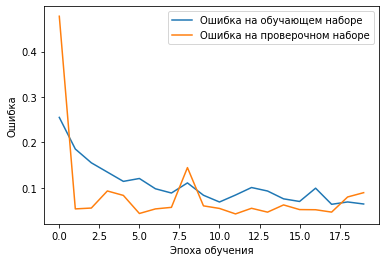

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model_ula.compile(loss='mse', optimizer=Adam(lr=1e-4))

history = model_ula.fit(x_train,y_train_scaled,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.15,
                        verbose=1)

Epoch 1/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0518 - val_loss: 0.0488
Epoch 2/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0380 - val_loss: 0.0494
Epoch 3/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0409 - val_loss: 0.0619
Epoch 4/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0293 - val_loss: 0.0489
Epoch 5/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0416 - val_loss: 0.0576
Epoch 6/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0284 - val_loss: 0.0514
Epoch 7/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0348 - val_loss: 0.0533
Epoch 8/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0350 - val_loss: 0.0523
Epoch 9/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.0430 - val_loss: 0.0499
Epoch 10/20
1584/1584 [==============================] - 5s 3ms/step - loss: 0.032

In [ ]:
predict = model_ula.predict(x_test)

predict = y_scaler.inverse_transform(predict).flatten()

delta = predict - y_test
abs_delta = abs(delta)

mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_test)/len(y_test)
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

Средняя ошибка:  63613
Средняя цена:  518857
Процент ошибки: 12%


In [ ]:
print('{:>10} {:>10} {:>10} {:>10}'.format('predict', 'y', 'error', 'error %'))

for i in range(30):
  price = predict[i] 
  real_price = y_test[i] 
  print('{:>10.0f} {:>10.0f} {:>10.0f} {:>10.3f}'.format(price, real_price, abs(price - real_price), ((price / real_price) - 1) * 100))

   predict          y      error    error %
    202072     150000      52072     34.715
    168019     110000      58019     52.745
    104118     195000      90882    -46.606
    549144     710000     160856    -22.656
    758172     919000     160828    -17.500
    962342     970000       7658     -0.790
    532337     200000     332337    166.168
    209807     350000     140193    -40.055
    502365     560000      57635    -10.292
     87813      40000      47813    119.533
    436099     490000      53901    -11.000
    757179     719000      38179      5.310
    147141      45000     102141    226.979
    745571     690000      55571      8.054
    451006     330000     121006     36.668
    645175     649000       3825     -0.589
    725373     679999      45374      6.673
   1030306     845000     185306     21.930
    219481     210000       9481      4.515
    129287      50000      79287    158.574
    121614     185000      63386    -34.263
    112784     140000      27216

In [ ]:
# создаем модель

model_ula = Sequential()
model_ula.add(Dense(2500, input_dim=x_train.shape[1], activation='relu'))
model_ula.add(Dropout(0.2))
model_ula.add(Dense(2500, activation='relu'))
model_ula.add(Dropout(0.2))
model_ula.add(Dense(1000, activation='relu'))
model_ula.add(Dropout(0.2))
model_ula.add(Dense(1, activation='linear'))

model_ula.compile(loss='mse', optimizer=Adam(lr=1e-3))

history = model_ula.fit(x_train,y_train_scaled,
                        epochs=20,
                        batch_size=64,
                        validation_split=0.15,
                        verbose=1)

Epoch 1/20
792/792 [==============================] - 4s 4ms/step - loss: 0.2567 - val_loss: 0.2740
Epoch 2/20
792/792 [==============================] - 3s 4ms/step - loss: 0.2371 - val_loss: 0.1315
Epoch 3/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1715 - val_loss: 0.0718
Epoch 4/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1182 - val_loss: 0.0563
Epoch 5/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1136 - val_loss: 0.0676
Epoch 6/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1822 - val_loss: 0.0576
Epoch 7/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1072 - val_loss: 0.0673
Epoch 8/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1202 - val_loss: 0.0642
Epoch 9/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1232 - val_loss: 0.0632
Epoch 10/20
792/792 [==============================] - 3s 4ms/step - loss: 0.1244 - val_loss: 0.0625

In [ ]:
model_ula.compile(loss='mse', optimizer=Adam(lr=1e-4))

history = model_ula.fit(x_train,y_train_scaled,
                        epochs=20,
                        batch_size=64,
                        validation_split=0.15,
                        verbose=1)

Epoch 1/20
792/792 [==============================] - 4s 4ms/step - loss: 0.0677 - val_loss: 0.0721
Epoch 2/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0687 - val_loss: 0.0643
Epoch 3/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0707 - val_loss: 0.0803
Epoch 4/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0725 - val_loss: 0.0656
Epoch 5/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0681 - val_loss: 0.0750
Epoch 6/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0455 - val_loss: 0.0866
Epoch 7/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0508 - val_loss: 0.0860
Epoch 8/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0627 - val_loss: 0.0638
Epoch 9/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0566 - val_loss: 0.0717
Epoch 10/20
792/792 [==============================] - 3s 4ms/step - loss: 0.0633 - val_loss: 0.0679

In [ ]:
predict = model_ula.predict(x_test)

predict = y_scaler.inverse_transform(predict).flatten()

delta = predict - y_test
abs_delta = abs(delta)

mean_delta = sum(abs_delta)/len(abs_delta)
mean_price = sum(y_test)/len(y_test)
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

Средняя ошибка:  88871
Средняя цена:  518857
Процент ошибки: 17%


Процент ошибки стал больше, когда увеличили количество нейронов в выборке

In [ ]:
print('{:>10} {:>10} {:>10} {:>10}'.format('predict', 'y', 'error', 'error %'))

for i in range(30):
  price = predict[i] 
  real_price = y_test[i] 
  print('{:>10.0f} {:>10.0f} {:>10.0f} {:>10.3f}'.format(price, real_price, abs(price - real_price), ((price / real_price) - 1) * 100))

   predict          y      error    error %
    288186     150000     138186     92.124
    247480     110000     137480    124.982
    205427     195000      10427      5.347
    592982     710000     117018    -16.481
    743765     919000     175235    -19.068
    995479     970000      25479      2.627
    548383     200000     348383    174.192
    306558     350000      43442    -12.412
    539284     560000      20716     -3.699
    176765      40000     136765    341.913
    512012     490000      22012      4.492
    762570     719000      43570      6.060
    249584      45000     204584    454.632
    780928     690000      90928     13.178
    503540     330000     173540     52.588
    657338     649000       8338      1.285
    725794     679999      45795      6.735
   1033859     845000     188859     22.350
    298023     210000      88023     41.916
    216760      50000     166760    333.521
    201589     185000      16589      8.967
    203792     140000      63792